In [1]:
from preprocess_train_val import *
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
import librosa.display

In [2]:
print(DATA_PATH)

../data/raw/Audio/


In [11]:
wandb.init()
config = wandb.config

config.max_len = 170
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["Not_Firearm", "Firearms"]

Saving vectors of label - 'Firearms':   0%|          | 0/155 [00:00<?, ?it/s]

The number of labels is:  2


/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':   1%|          | 1/155 [00:00<00:43,  3.52it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':   1%|▏         | 2/155 [00:00<00:42,  3.64it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':   2%|▏         | 3/155 [00:00<00:36,  4.16it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile 

Saving vectors of label - 'Firearms':  42%|████▏     | 65/155 [00:14<00:25,  3.50it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  43%|████▎     | 67/155 [00:15<00:20,  4.27it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  45%|████▍     | 69/155 [00:15<00:16,  5.28it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  45%|████▌     | 70/155 [00:15<00:17,  4.93it/s]/opt/anaconda3/envs/add

Saving vectors of label - 'Firearms':  88%|████████▊ | 136/155 [00:30<00:03,  4.79it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  89%|████████▉ | 138/155 [00:30<00:03,  4.54it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  90%|████████▉ | 139/155 [00:31<00:03,  4.62it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms':  92%|█████████▏| 142/155 [00:31<00:02,  4.57it/s]/opt/anaconda3/envs

In [12]:
# # Loading train set and validation set
X_train, X_val, y_train, y_val = get_train_validation()

The number of labels is:  2


In [13]:
# # Feature dimension
channels = 1
config.epochs = 50 # hyperparameter
config.batch_size = 100 # hyperparameter

num_classes = 2

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_val = X_val.reshape(X_val.shape[0], config.buckets, config.max_len, channels)

In [14]:
X_train.shape

(1481, 20, 170, 1)

In [15]:
X_val.shape

(636, 20, 170, 1)

In [16]:
y_train.shape

(1481,)

In [17]:
c=0
for element in y_train:
    if element==0:
        print(c)
    c+=1

6
29
33
37
50
79
113
141
157
165
172
177
189
216
223
229
238
247
263
266
268
309
341
342
358
372
384
389
420
428
430
451
460
466
484
487
517
518
519
523
541
542
546
551
555
557
581
583
595
596
597
599
601
605
608
609
621
625
627
643
649
650
657
662
676
681
687
698
750
756
757
780
782
799
829
849
860
867
893
899
907
939
953
963
987
994
1004
1012
1029
1033
1046
1048
1066
1077
1078
1105
1123
1129
1160
1167
1175
1176
1184
1205
1219
1234
1246
1268
1269
1350
1384
1396
1398
1416
1440
1463
1471


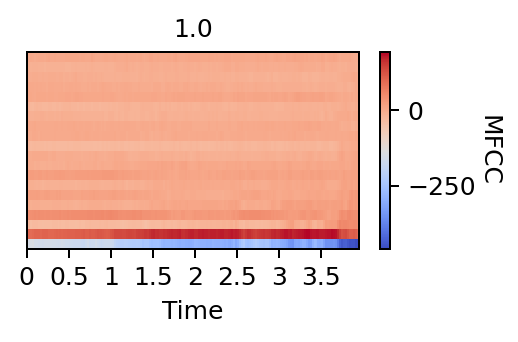

In [49]:
num=51
plt.figure(figsize=(3,2),dpi=180)
librosa.display.specshow(X_train[num, :, :, 0],x_axis='time')
plt.title(str(y_train[num]),fontsize=10)
cbar=plt.colorbar()
cbar.set_label('MFCC',rotation=270,fontsize=10,labelpad=10)
plt.tight_layout()
plt.savefig('../reports/figures/'+'MFCC_'+str(num)+'.png')

In [50]:
y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)

In [51]:
pd.DataFrame(y_train_hot).sum()

0     117.0
1    1364.0
dtype: float32

In [62]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_val = X_val.reshape(X_val.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=.05) #optimizer

model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6802      
Total params: 6,802
Trainable params: 6,802
Non-trainable params: 0
_________________________________________________________________


In [64]:
wandb.init()
history1=model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_val, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])


Epoch 1/50
47/47 [==============================] - 0s 7ms/step - loss: 595.0141 - accuracy: 0.9034 - val_loss: 101.7515 - val_accuracy: 0.9607
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 143.1950 - accuracy: 0.9399 - val_loss: 90.9329 - val_accuracy: 0.9686
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 154.8814 - accuracy: 0.9386 - val_loss: 98.4217 - val_accuracy: 0.9481
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 96.0779 - accuracy: 0.9399 - val_loss: 75.8842 - val_accuracy: 0.9528
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 76.4512 - accuracy: 0.9527 - val_loss: 80.6429 - val_accuracy: 0.9497
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 38.4302 - accuracy: 0.9581 - val_loss: 90.8846 - val_accuracy: 0.9638
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 98.0353 - accuracy: 0.9480 - val_loss: 141.3370 - val_accuracy: 0.9513
E

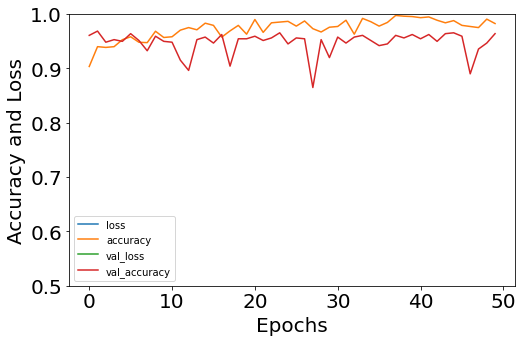

wandb: ERROR Error uploading "media/images/examples_42.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp03h7ztz_wandb/20grlt4g-media/images/examples_42.png size shrank from 90634 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_49.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp03h7ztz_wandb/z76yjnu8-media/images/examples_49.png size shrank from 88357 to 0 while it was being uploaded.
wandb: Network error resolved after 0:00:23.173632, resuming normal operation.
wandb: Network error resolved after 0:00:23.179443, resuming normal operation.
wandb: Network error resolved after 0:00:23.196343, resuming normal operation.
wandb: Network error resolved after 0:00:23.228957, resuming normal operation.
wandb: ERROR Error uploading "media/images/examples_47.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp03h7ztz_wandb/3cwtm5ww-media/images/examples_47.png size shrank from 88885 to 0

In [65]:
pd.DataFrame(history1.history).plot(figsize=(8,5),fontsize=20)
# plt.grid(True)
plt.gca().set_ylim(.5,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();

## Test the Sequential NN with some Test Data

In [66]:
from preprocess_test import *

In [67]:
print(DATA_PATH_TEST)

../data/raw_test/


In [68]:
get_test

<function preprocess_test.get_test(split_ratio=0.9, random_state=42)>

In [69]:
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)
labels=["Not_Firearm_test", "Firearms_test"]

Saving vectors of label - 'Not_Firearm_test':   3%|▎         | 1/38 [00:00<00:05,  6.22it/s]

The number of labels is:  2


Saving vectors of label - 'Firearms_test':   8%|▊         | 3/37 [00:00<00:09,  3.62it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms_test':  11%|█         | 4/37 [00:00<00:09,  3.56it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms_test':  16%|█▌        | 6/37 [00:01<00:07,  3.88it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'Firearms_test':  22%|██▏       | 8/37 [00:01<00:06,  4.25it/s]/opt/anacon

In [70]:
x_non = np.load(labels[0] + '.npy')
print('The number of non firearms',len(x_non))
x_fa= np.load(labels[1] + '.npy')
print('The number of firearms',len(x_fa))

The number of non firearms 38
The number of firearms 37


In [71]:
X_test, X_none, y_test, y_none = get_test()

The number of labels is:  2


In [72]:
print(X_test.shape)
print(y_test.shape)
print(X_none.shape)
print(y_none.shape)

(67, 20, 170)
(67,)
(8, 20, 170)
(8,)


In [73]:
X_test=np.concatenate((X_test,X_none),axis=0)
Y_test=np.concatenate((y_test,y_none),axis=0)
print(X_test.shape)
print(Y_test.shape)

(75, 20, 170)
(75,)


In [74]:
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)
print(X_test.shape)

(75, 20, 170, 1)


In [75]:
Y_test_hot = to_categorical(Y_test)
print(Y_test_hot.shape)

(75, 2)


In [76]:
pd.DataFrame(Y_test_hot).sum()

0    38.0
1    37.0
dtype: float32

Somehow, the columns are flipped, relative to the training/validation data above.  I know that there are 38 non-firearm sound clips, and there are 37 firearm sound clips.  Therefore, I need to flip the columns in the array: 

In [79]:
Y_test_hot=np.flip(Y_test_hot,axis=1)
pd.DataFrame(Y_test_hot).sum()

0    37.0
1    38.0
dtype: float32

In [115]:
m_eval=model.evaluate(X_test, np.abs(Y_test_hot))
accuracy=round(m_eval[1]*100,1)
print('\nThe accuracy is:', accuracy,'%')

3/3 [==============================] - 0s 2ms/step - loss: 1805.3746 - accuracy: 0.7733

The accuracy is: 77.3 %


In [81]:
Y_predict=model.predict(X_test)

In [82]:
pd.DataFrame(Y_predict.round())

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
70,0.0,1.0
71,0.0,1.0
72,1.0,0.0
73,0.0,1.0


In [83]:
pd.DataFrame(Y_predict.round()).sum()

0    20.0
1    55.0
dtype: float32

In [84]:
pd.DataFrame(Y_test_hot).sum()

0    37.0
1    38.0
dtype: float32

In [85]:
pd.DataFrame(y_train_hot).sum()

0     117.0
1    1364.0
dtype: float32

In [86]:
Y_test_hot[:,0:1].sum()

37.0

In [108]:
Y_test_hot[:,1].sum()

37.0

In [90]:
import sklearn
conf_mat1=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[0],pd.DataFrame(Y_predict).round()[0])

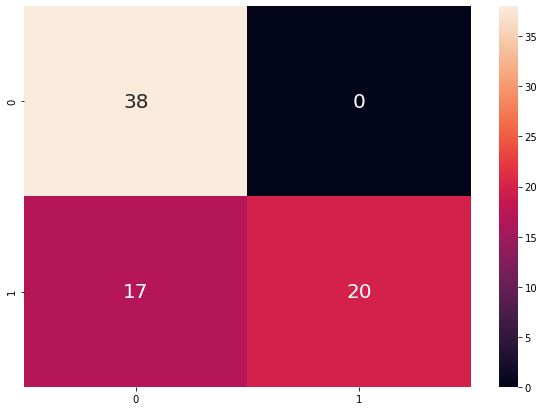

In [91]:
import seaborn as sn 

df_cm = pd.DataFrame(conf_mat1, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})

In binary classification, the count of true negatives is , false negatives is , true positives is  and false positives is .
* The element, c$_{0,0}$, is equal to 38.  This indicates that there are 38 true negatives.
* The element, c$_{1,0}$, is equal to 17.  This indicates that there are 17 false negatives.
* The element, c$_{0,1}$, is equal to 0.  This indicates that there are 0 false positives. 
* The element, c$_{1,1}$, is equal to 20.  Thus, there are 20 true positives. 

In the context of predicting firearms, the presence of false negatives is grave.  This means that the 17 sounds were actually the sounds of firearms, but it was predicted that they were not. 

In [118]:
models_path='../models/'
filename = 'seq_nn_model'+str(accuracy)+'_accuracy.h5'
nn_model = models_path+filename

print(nn_model)
model.save(nn_model)

../models/seq_nn_model77.3_accuracy.h5


## Adding Convolution 

In [154]:
#input_shape=(batch_size, channels, rows, cols)
alpha=0.0002
input_shape=(20,170,1)

model2 = Sequential()
model2.add(Conv2D(32,(2,2),
                 input_shape=input_shape,
                 activation='relu',
                 data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

opt2 = keras.optimizers.Adam(learning_rate=alpha)

model2.compile(loss="categorical_crossentropy",
              optimizer=opt2,
              metrics=['accuracy'])

In [155]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 19, 169, 32)       160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 84, 32)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 24192)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               3096704   
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 3,097,122
Trainable params: 3,097,122
Non-trainable params: 0
_________________________________________________________________


In [156]:
print(X_train.shape)
print(np.reshape(X_train,(1481,20,170,1)).shape)
X_train2=np.reshape(X_train,(1481,20,170,1))
print(y_train_hot.shape)
print(X_val.shape)
X_val2=np.reshape(X_val,(636,20,170,1))
print(X_val2.shape)
print(y_val_hot.shape)
print(config.buckets)
print(config.max_len)
print(channels)

(1481, 20, 170)
(1481, 20, 170, 1)
(1481, 2)
(636, 20, 170)
(636, 20, 170, 1)
(636, 2)
20
170
1


In [157]:
wandb.init()
history=model2.fit(X_train2, y_train_hot, epochs=config.epochs, validation_data=(X_val2, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Epoch 1/50
47/47 [==============================] - 1s 29ms/step - loss: 6.5979 - accuracy: 0.9210 - val_loss: 1.9487 - val_accuracy: 0.9025
Epoch 2/50
47/47 [==============================] - 1s 25ms/step - loss: 1.1331 - accuracy: 0.9527 - val_loss: 0.5624 - val_accuracy: 0.9780
Epoch 3/50
47/47 [==============================] - 1s 24ms/step - loss: 0.8133 - accuracy: 0.9588 - val_loss: 0.5897 - val_accuracy: 0.9560
Epoch 4/50
47/47 [==============================] - 1s 25ms/step - loss: 0.5933 - accuracy: 0.9689 - val_loss: 0.7640 - val_accuracy: 0.9214
Epoch 5/50
47/47 [==============================] - 1s 26ms/step - loss: 0.2966 - accuracy: 0.9716 - val_loss: 0.6031 - val_accuracy: 0.9780
Epoch 6/50
47/47 [==============================] - 1s 25ms/step - loss: 0.4350 - accuracy: 0.9723 - val_loss: 2.0319 - val_accuracy: 0.9701
Epoch 7/50
47/47 [==============================] - 1s 26ms/step - loss: 0.4179 - accuracy: 0.9818 - val_loss: 0.2309 - val_accuracy: 0.9874
Epoch 8/50
47

wandb: ERROR Error uploading "media/images/examples_3.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpsrfksfdlwandb/2wcx4ke8-media/images/examples_3.png size shrank from 84203 to 0 while it was being uploaded.


47/47 [==============================] - 1s 25ms/step - loss: 6.8483e-06 - accuracy: 1.0000 - val_loss: 0.3426 - val_accuracy: 0.9858
Epoch 28/50
37/47 [======================>.......] - ETA: 0s - loss: 5.8936e-06 - accuracy: 1.0000

wandb: Network error resolved after 0:00:20.478547, resuming normal operation.


47/47 [==============================] - 1s 25ms/step - loss: 5.4535e-06 - accuracy: 1.0000 - val_loss: 0.3429 - val_accuracy: 0.9843
Epoch 29/50
47/47 [==============================] - 1s 26ms/step - loss: 4.1218e-06 - accuracy: 1.0000 - val_loss: 0.3431 - val_accuracy: 0.9843
Epoch 30/50
47/47 [==============================] - 1s 26ms/step - loss: 3.6426e-06 - accuracy: 1.0000 - val_loss: 0.3432 - val_accuracy: 0.9843
Epoch 31/50
47/47 [==============================] - 1s 25ms/step - loss: 3.2907e-06 - accuracy: 1.0000 - val_loss: 0.3433 - val_accuracy: 0.9843
Epoch 32/50
25/47 [==============>...............] - ETA: 0s - loss: 3.8788e-06 - accuracy: 1.0000

wandb: Network error resolved after 0:00:24.262177, resuming normal operation.


47/47 [==============================] - 1s 27ms/step - loss: 3.0619e-06 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.9843
Epoch 33/50
47/47 [==============================] - 2s 32ms/step - loss: 2.8846e-06 - accuracy: 1.0000 - val_loss: 0.3434 - val_accuracy: 0.9843
Epoch 34/50
 6/47 [==>...........................] - ETA: 0s - loss: 4.8343e-06 - accuracy: 1.0000

wandb: Network error resolved after 0:00:24.778051, resuming normal operation.


12/47 [======>.......................] - ETA: 0s - loss: 2.8374e-06 - accuracy: 1.0000

wandb: Network error resolved after 0:00:29.938910, resuming normal operation.


43/47 [==========================>...] - ETA: 0s - loss: 2.8831e-06 - accuracy: 1.0000

wandb: Network error resolved after 0:00:29.604514, resuming normal operation.
wandb: Network error resolved after 0:00:24.596964, resuming normal operation.


47/47 [==============================] - 1s 27ms/step - loss: 2.6824e-06 - accuracy: 1.0000 - val_loss: 0.3436 - val_accuracy: 0.9843
Epoch 35/50
47/47 [==============================] - 1s 26ms/step - loss: 2.5888e-06 - accuracy: 1.0000 - val_loss: 0.3437 - val_accuracy: 0.9843
Epoch 36/50
47/47 [==============================] - 1s 26ms/step - loss: 2.5060e-06 - accuracy: 1.0000 - val_loss: 0.3437 - val_accuracy: 0.9843
Epoch 37/50
47/47 [==============================] - 1s 27ms/step - loss: 2.4302e-06 - accuracy: 1.0000 - val_loss: 0.3437 - val_accuracy: 0.9843
Epoch 38/50
47/47 [==============================] - 1s 27ms/step - loss: 2.3626e-06 - accuracy: 1.0000 - val_loss: 0.3438 - val_accuracy: 0.9843
Epoch 39/50
47/47 [==============================] - 1s 25ms/step - loss: 2.2981e-06 - accuracy: 1.0000 - val_loss: 0.3438 - val_accuracy: 0.9843
Epoch 40/50
47/47 [==============================] - 1s 27ms/step - loss: 2.2528e-06 - accuracy: 1.0000 - val_loss: 0.3438 - val_accurac

wandb: ERROR Error uploading "media/images/examples_26.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpsrfksfdlwandb/uszswqh8-media/images/examples_26.png size shrank from 88398 to 0 while it was being uploaded.
wandb: Network error resolved after 0:00:23.083024, resuming normal operation.
wandb: Network error resolved after 0:00:25.611640, resuming normal operation.
wandb: ERROR Error uploading "media/images/examples_29.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpsrfksfdlwandb/3q4mare2-media/images/examples_29.png size shrank from 83202 to 0 while it was being uploaded.
wandb: Network error resolved after 0:00:25.061322, resuming normal operation.


In [158]:
m2_eval=model2.evaluate(X_test, np.abs(Y_test_hot))
accuracy2=round(m2_eval[1]*100,1)
print('\nThe accuracy is:', accuracy2,'%')

3/3 [==============================] - 0s 5ms/step - loss: 2.2281 - accuracy: 0.9200

The accuracy is: 92.0 %


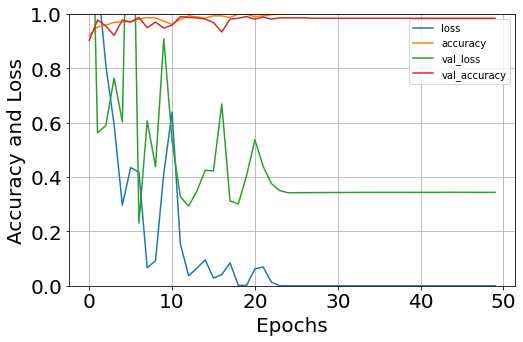

<Figure size 432x288 with 0 Axes>

wandb: Network error resolved after 0:01:26.077794, resuming normal operation.


In [159]:
pd.DataFrame(history.history).plot(figsize=(8,5),fontsize=20)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();
plt.savefig('../reports/CNN_'+'alpha_'+str(alpha)+'_'+str(accuracy2)+'.png')

In [160]:
models_path='../models/'
filename = 'cnn_model_accuracy_' +str(accuracy2)+'_alpha_'+str(alpha)+'.h5'
cnn_model = models_path+filename

print(cnn_model)
model2.save(cnn_model)

../models/cnn_model_accuracy_92.0_alpha_0.0002.h5


In [161]:
Y_predict2=model2.predict(X_test)

In [162]:
conf_mat2=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[0],pd.DataFrame(Y_predict2).round()[0])

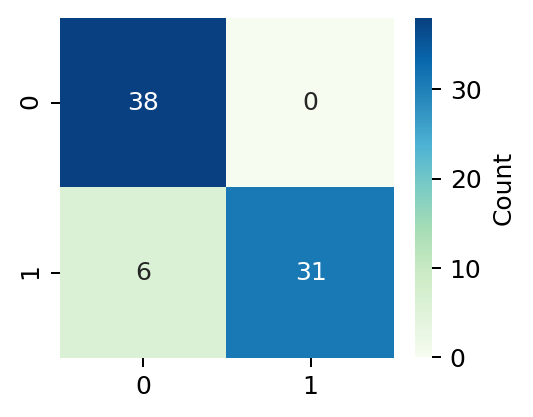

wandb: Network error resolved after 0:01:55.353191, resuming normal operation.


In [163]:
df_cm = pd.DataFrame(conf_mat2, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (3,2.5),dpi=180)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},cmap="GnBu",cbar_kws={'label': 'Count'})
plt.savefig('../reports/figures/CNN_confusion_mat_'+str(accuracy2)+'_alpha_'+str(alpha)+'.png')

## Using a Different Metric in the CNN

In [ ]:
#input_shape=(batch_size, channels, rows, cols)
alpha3=0.0002
input_shape=(20,170,1)

model3 = Sequential()
model3.add(Conv2D(32,(2,2),
                 input_shape=input_shape,
                 activation='relu',
                 data_format='channels_last'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

opt3 = keras.optimizers.Adam(learning_rate=alpha)

model3.compile(loss="categorical_crossentropy",
              optimizer=opt2,
              metrics=['accuracy'])

In [ ]:
model3.summary()